**Mise en forme des données**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
uci = pd.read_csv('UCI_Credit_Card.csv', delimiter=',')
print(uci.values.shape)
X = uci.values[:, 1:-1]
Y = uci.values[:,-1]

size = len(Y)

perm = np.arange(size)
np.random.shuffle(perm)

X_train = X[perm[0:20000], :]
Y_train = Y[perm[0:20000]]
X_val = X[perm[20000:25000],:]
Y_val = Y[perm[20000:25000]]
X_test = X[perm[25000:], :]
Y_test = Y[perm[25000:]]

print(f'{X_train.shape} training samples, {X_val.shape} validation sampels, {X_test.shape} test samples')

(30000, 25)
(20000, 23) training samples, (5000, 23) validation sampels, (5000, 23) test samples


**Affichage des données en 2D**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#0000FF', '#FF0000'])

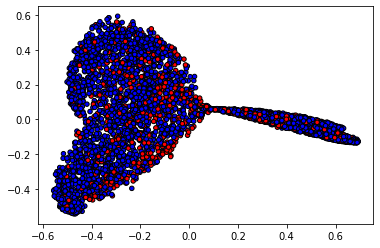

In [ ]:
minmax = MinMaxScaler(feature_range=(-1,1))
X = minmax.fit_transform(X_val)

proj = KernelPCA(n_components=2, kernel='rbf', gamma=1.0)
X_pca = proj.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_val, cmap=cmap, edgecolors='k', s=20)

**Méthodes linéares**

In [ ]:
#we change the name of the target value to 'default' to make things easier for us later 
uci.rename(columns={"default.payment.next.month": "Default"}, inplace=True) 
#displaying of the first 5 rows of our dataset 
uci.head(10) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [ ]:
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
#target variable default=1 or non-default=0
y = uci.Default   
#taking 
features = uci.drop('Default', axis = 1, inplace = False)
#group the categories 4:others, 5:unknown, and 6:unknown can be grouped into a single class '4'.
uci['EDUCATION']=np.where(uci['EDUCATION'] == 5, 4, uci['EDUCATION'])
uci['EDUCATION']=np.where(uci['EDUCATION'] == 6, 4, uci['EDUCATION'])
uci['EDUCATION']=np.where(uci['EDUCATION'] == 0, 4, uci['EDUCATION'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Statistiques du dataset | Pourcentage des personnes qui ont de payment default et ceux de non-default ')

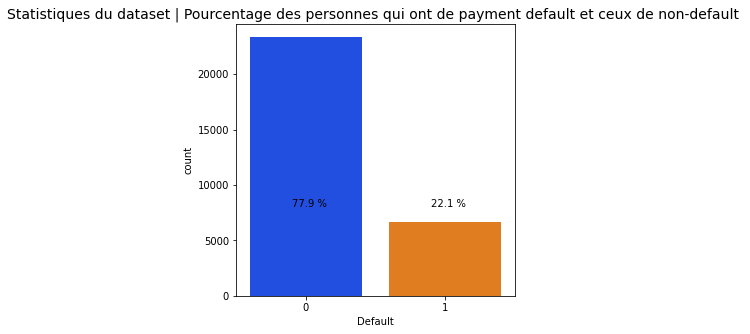

In [ ]:
import seaborn as sns
# The frequency of defaults
yes = uci.Default.sum()
no = len(uci)-yes
# calculating the Percentage of the default credit cards and the non-default
yes_percentage = round(yes/len(uci)*100, 1)
no_percentage = round(no/len(uci)*100, 1)
import sys 
plt.figure(figsize=(5,5))
sns.countplot('Default',data=uci, palette="bright")
plt.annotate(str(no_percentage)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=10)
plt.annotate(str(yes_percentage)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=10)
plt.title('Statistiques du dataset | Pourcentage des personnes qui ont de payment default et ceux de non-default ', size=14)

**Dans cet échantillon de 30 000 détenteurs de cartes de crédit, il y avait 6 636 cartes de crédit en défaut, c'est-à-dire que la proportion de défaut dans les données est de 22,1%.** 

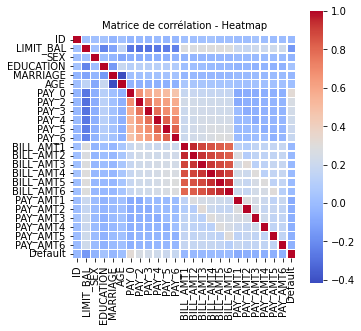

In [ ]:
#  looking at correlations matrix  
correlation = uci.corr() # .corr is used to find corelation
figure,axis = plt.subplots(figsize=(5, 5))
sns.heatmap(correlation, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=axis)
plt.title('Matrice de corrélation - Heatmap', size=10);

**La matrice de corrélation montre que les caractéristiques sont corrélées entre elles (colinéarité), telles que PAY_0,2,3,4,5,6 et BILL_AMT1,2,3,4,5,6. Dans ces cas, la corrélation est positive.**

Text(0.5, 1.0, 'distinguishing between Default and Non-default')

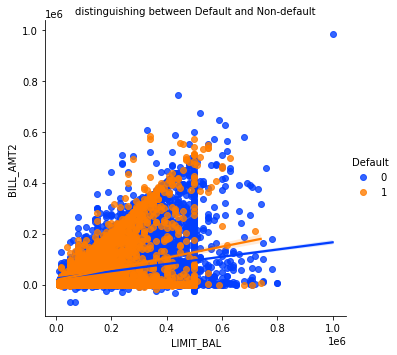

In [ ]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = uci, hue ='Default', 
           palette='bright')
plt.title('distinguishing between Default and Non-default', size=10)

**k-nearest neighbors**

In [ ]:
def distance(pa,pb):
    return np.sum((pa-pb)**2)**0.5

In [ ]:
def KNN(x, y, x_query, k=5):
    m = x.shape[0]
    distances = []
    for i in range(m):
        dis = distance(x_query, x[i]) 
        
        distances.append((dis, y[i]))
   
    distances = sorted(distances)
    distances = distances[:k]
    distances = np.array(distances)
    labels = distances[:, 1]
    uniq_label, counts = np.unique(labels, return_counts=True)
    pred = uniq_label[counts.argmax()]
    return (pred)

In [ ]:
prediction = []
for i in range(200):
    p = KNN(X_train, Y_train, X_test[i], k =7)
    prediction.append(p)


predictions = np.array(prediction)
predictions.sum()/len(predictions)*10

0.8500000000000001

**Decision trees**

In [ ]:
#Decision Tree       
data_uci = pd.read_csv('UCI_Credit_Card.csv')
data_uci = data_uci.drop(['ID'],axis=1)
y = data_uci['default.payment.next.month'].values
y = y.reshape(-1,1)
x_data_uci = data_uci.drop(['default.payment.next.month'], axis=1)
x = (x_data_uci - np.min(x_data_uci)) / (np.max(x_data_uci) - np.min(x_data_uci)).values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
#classification
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train.ravel())
print("Taux de précision du classifieur: ", dtree.score(x_test, y_test)*100, "%")

Taux de précision du classifieur:  73.2 %


**SVM**

In [ ]:
class SVM:
    def __init__(self, iterations=1500, lr=0.01, lambdaa=0.01):
        self.lambdaa = lambdaa
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None
        

    def initialize_parameters(self,X):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        
    def gradient_descent(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        for i, x in enumerate(X):
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambdaa * self.w
                db = 0
            else:
                dw = 2 * self.lambdaa * self.w - np.dot(x, y_[i])
                db = y_[i]
                #update the weights using update weight function
            self.update_parameters(dw,db)

        
    def update_parameters(self, dw, db): 
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db

        
    def fit(self, X, y):
        #init
        self.initialize_parameters(X)
        for i in range(self.iterations):
            self.gradient_descent(X,y)
            

    def predict(self, X):
        # get outputs
        output = np.dot(X, self.w) - self.b
        label_signs = np.sign(output)
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

In [ ]:
#clasification svm
model = SVM()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

In [ ]:
#metrics
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.2178

**Boosting**

In [ ]:
#calcul d'erreur
def compute_error(y, y_pred, w_i):
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)
#calcul alpha
def compute_alpha(error):
    return np.log((1 - error) / error)
#update weights
def update_weights(w_i, alpha, y, y_pred): 
    return w_i * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

In [ ]:
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M = 100):

        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  
            else:

                w_i = update_weights(w_i, alpha_m, y, y_pred)

            G_m = DecisionTreeClassifier(max_depth = 1)     
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) 
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)

In [ ]:
# fonction prédiction 
def predict(self, X):
        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 
        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

In [ ]:
aboost = AdaBoost()
aboost.fit(X_train,Y_train, M= 3000)
predict = aboost.predict(X_test)

AttributeError: ignored